## Importing

In [49]:
#!/usr/bin/env python

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
import pandas
import certifi
import json
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil import parser
import matplotlib.pyplot as plt
import csv
import os
import ast


ModuleNotFoundError: No module named 'sklearn'

# Creating Data Frames

#### Observed stocks:

In [2]:
stock_list = ['DIS','T','NFLX','AMZN','BBY','CMG','KO','CL','COST','EQT','CVX','XOM','JPM','AXP','BAC','CVS','TECH','JNJ','BA','FDX','GE','AAPL','IBM','INTC','AMCR','ECL','NEM','IRM','AMT','EQIX','EXC','NRG','EIX']

#### Selected Sector's Stocks (Energy):

In [5]:
energy_stocks = ['APA','BKR','CVX','COP','CTRA','DVN','FANG','EOG','EQT','XOM','HAL','HES','KMI','MRO','MPC','OXY','OKE','PSX','PXD','SLB','TRGP','VLO','WMB']

#### Creating json daily files:

In [ ]:
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

for i in stock_list:
    url = ("https://financialmodelingprep.com/api/v3/historical-price-full/{}?apikey=2f1c3c73de79230c2b4b038861ddf970".format(i))
    j = get_jsonparsed_data(url)
    df = pd.DataFrame(j['historical'])
    stock_name = j['symbol']
    df.to_csv('C:/Users/niroe/OneDrive/Documents/Important/project/df_daily/Observed/{}.csv'.format(stock_name), index=False)
    
for i in energy_stocks:
    url = ("https://financialmodelingprep.com/api/v3/historical-price-full/{}?apikey=2f1c3c73de79230c2b4b038861ddf970".format(i))
    j = get_jsonparsed_data(url)
    df = pd.DataFrame(j['historical'])
    stock_name = j['symbol']
    df.to_csv('C:/Users/niroe/OneDrive/Documents/Important/project/df_daily/Energy Sector/{}.csv'.format(stock_name), index=False)

#### Creating json hourly files:

In [ ]:
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

for i in stock_list:
    url = ("https://financialmodelingprep.com/api/v3/historical-chart/1hour/{}?apikey=2f1c3c73de79230c2b4b038861ddf970".format(i))
    j = get_jsonparsed_data(url)
    df = pd.DataFrame(j)
    stock_name = i
    df.to_csv('C:/Users/niroe/OneDrive/Documents/Important/project/df_hourly/Observed/{}.csv'.format(stock_name), index=False)
    
for i in energy_stocks:
    url = ("https://financialmodelingprep.com/api/v3/historical-price-full/{}?apikey=2f1c3c73de79230c2b4b038861ddf970".format(i))
    j = get_jsonparsed_data(url)
    df = pd.DataFrame(j['historical'])
    stock_name = j['symbol']
    df.to_csv('C:/Users/niroe/OneDrive/Documents/Important/project/df_hourly/Energy Sector/{}.csv'.format(stock_name), index=False)

# Initial Observation

#### Raw Data

In [6]:
df= pd.read_csv('C:/Users/niroe/OneDrive/Documents/Important/project/df_daily/Observed/AAPL.csv')
df.head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2023-05-08,172.480,173.82,172.11,173.23,173.230000,20870258,20870258,0.750,0.434833,173.05,"May 08, 23",0.004348
1,2023-05-05,170.975,174.30,170.76,173.57,173.570007,112900196,109452410,2.595,1.520000,173.31,"May 05, 23",0.015200
2,2023-05-04,164.890,167.04,164.31,165.79,165.789993,81225673,81235400,0.900,0.545820,166.10,"May 04, 23",0.005458
3,2023-05-03,169.500,170.92,167.16,167.45,167.449997,65126998,65136000,-2.050,-1.210000,169.01,"May 03, 23",-0.012100
4,2023-05-02,170.090,170.35,167.54,168.54,168.539993,48425696,48425700,-1.550,-0.911280,168.70,"May 02, 23",-0.009113


### Visualization

##### Viewing the whole data at once

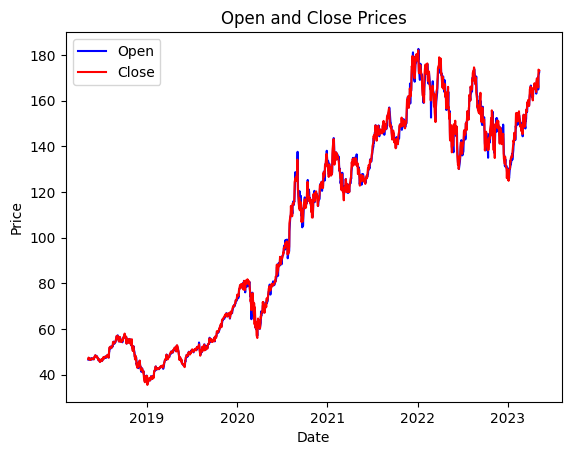

In [12]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot 'open' and 'close' prices
ax.plot(df['date'], df['open'], color='blue', label='Open')
ax.plot(df['date'], df['close'], color='red', label='Close')

# Set the title and axis labels
ax.set_title('Open and Close Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

# Display the plot
plt.show()

##### Viewing each month separately for better viewing

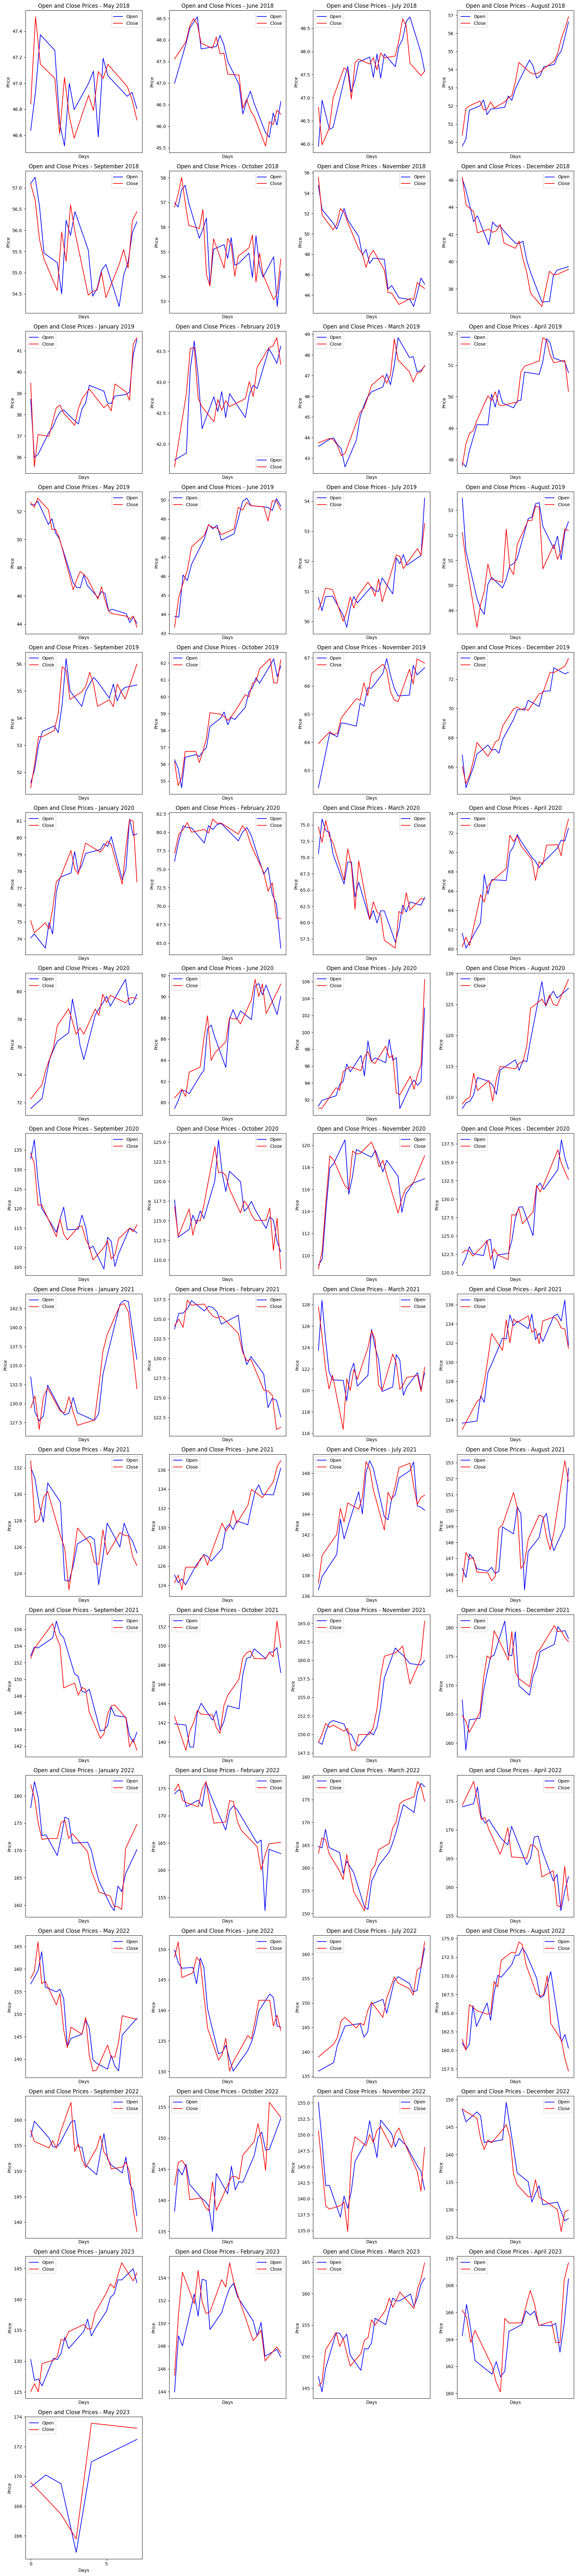

In [20]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Group data by month
grouped_data = df.groupby(pd.Grouper(key='date', freq='M'))

# Calculate the number of rows and columns for subplots
num_months = len(grouped_data)
num_cols = 4  # Four subplots in each row

# Calculate the number of rows needed based on the number of subplots
num_rows = (num_months + num_cols - 1) // num_cols

# Set up the figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Iterate over the grouped data and plot 'open' and 'close' prices for each month
for i, (month, group) in enumerate(grouped_data):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    days = (group['date'] - group['date'].min()).dt.days
    ax.plot(days, group['open'], color='blue', label='Open')
    ax.plot(days, group['close'], color='red', label='Close')
    ax.set_title(f"Open and Close Prices - {month.strftime('%B %Y')}")
    ax.set_xlabel('Days')
    ax.set_ylabel('Price')
    ax.legend()

    # Hide x-axis ticks for all but the bottom row
    if row != num_rows - 1:
        ax.set_xticks([])
    else:
        ax.set_xticks(range(days.min(), days.max() + 1, 5))

# Hide any unused subplots
for i in range(num_months, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

##### Using a correlation matrix to figure out which features are best for analyzing the data

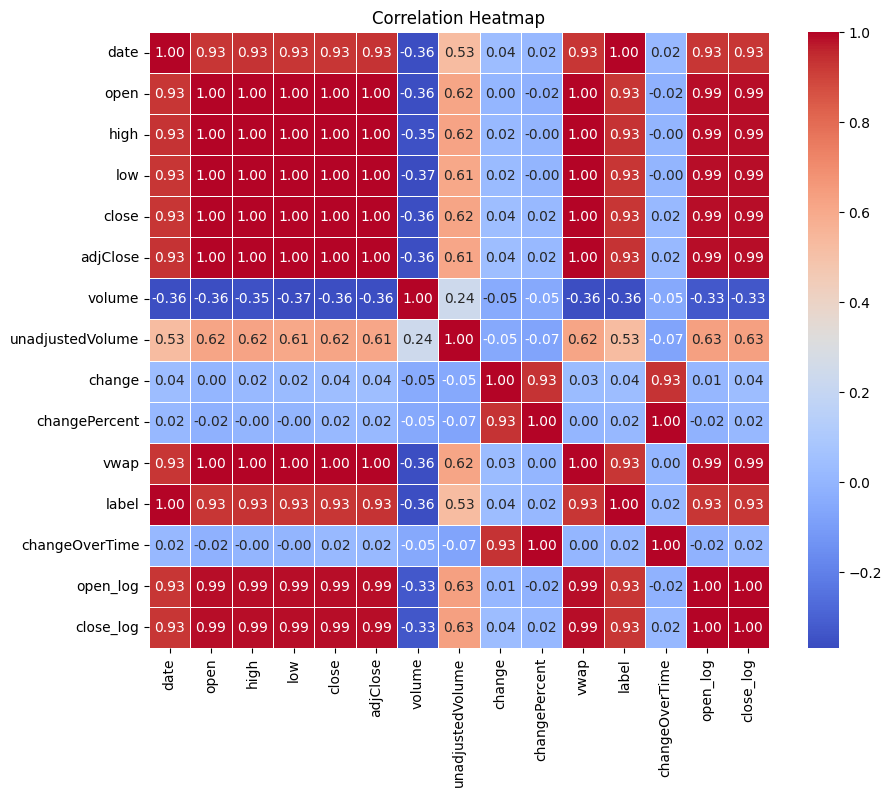

Correlation with Target Variable:
open                1.000000
high                0.999682
vwap                0.999622
low                 0.999616
close               0.999173
adjClose            0.999122
open_log            0.988853
close_log           0.988193
date                0.929712
label               0.929712
unadjustedVolume    0.619049
volume              0.359154
changePercent       0.020767
changeOverTime      0.020767
change              0.001840
Name: open, dtype: float64
Best Features to Analyze the Data:
['high', 'vwap', 'low']


In [35]:
# Convert 'Date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Parse the dates using dateutil.parser.parse()
#df['label'] = df['label'].apply(parser.parse)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Set the title
ax.set_title('Correlation Heatmap')

# Display the heatmap
plt.show()

# Select the target variable
target_variable = 'open'

# Calculate the correlation between each feature and the target variable
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Print the correlation with the target variable
print("Correlation with Target Variable:")
print(correlation_with_target)

# Select the top-k features with the highest absolute correlation coefficients
k = 3
best_features = correlation_with_target[1:k+1].index.tolist()

# Print the best features
print("Best Features to Analyze the Data:")
print(best_features)

### Discovering outliers

In [45]:
# Assuming 'df' is your DataFrame and 'feature' is the column you want to analyze
# Calculate the z-score for the feature
z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

# Define a threshold (e.g., 3) to identify outliers
threshold = 3

# Identify outliers based on the threshold
outliers = df[z_scores > threshold]

# Calculate the lower and upper percentiles excluding outliers
lower_percentile = np.percentile(df[feature][~(z_scores > threshold)], 1)
upper_percentile = np.percentile(df[feature][~(z_scores > threshold)], 99)

# Remove the top and bottom percentiles from the data
df_filtered = df[(df[feature] >= lower_percentile) & (df[feature] <= upper_percentile)]

# Print the filtered data
print("Filtered Data:")
print(df_filtered)

Filtered Data:
           date      open      high       low     close    adjClose   
0    2023-05-08  172.4800  173.8200  172.1100  173.2300  173.230000  \
1    2023-05-05  170.9750  174.3000  170.7600  173.5700  173.570007   
2    2023-05-04  164.8900  167.0400  164.3100  165.7900  165.789993   
3    2023-05-03  169.5000  170.9200  167.1600  167.4500  167.449997   
4    2023-05-02  170.0900  170.3500  167.5400  168.5400  168.539993   
...         ...       ...       ...       ...       ...         ...   
1253 2018-05-15   46.6950   46.7675   46.2750   46.6100   44.605644   
1254 2018-05-14   47.2525   47.3825   46.9650   47.0375   45.014744   
1255 2018-05-11   47.3725   47.5150   46.8625   47.1475   45.120029   
1256 2018-05-10   46.9350   47.5925   46.9125   47.5100   45.292290   
1257 2018-05-09   46.6375   46.8500   46.3050   46.8400   44.653561   

         volume  unadjustedVolume  change  changePercent    vwap      label   
0      20870258          20870258  0.7500       0.434